In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from pytrends.request import TrendReq
pytrend = TrendReq()
key_words = ['US China Trade War', 'South China Sea', 'Huawei Ban', 'Taiwan Relations', 
             'US China Tensions', 'US China Tariffs', 'Chinese Students in US']
data = pd.DataFrame()
for word in key_words:
    pytrend.build_payload(kw_list=[word], timeframe = '2022-10-1 2023-9-30', geo = 'US') 
    py_res = pytrend.interest_over_time()
    if word == 'US China Trade War':
        data = py_res
    else:
        data = data.merge(py_res, on = 'date')
    py_res.to_csv(word + '.csv')

/var/folders/74/xjyr_wpj7njfggsgt60kbgvc0000gn/T/ipykernel_89882/566255234.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'isPartial_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = data.merge(py_res, on = 'date')
/var/folders/74/xjyr_wpj7njfggsgt60kbgvc0000gn/T/ipykernel_89882/566255234.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'isPartial_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = data.merge(py_res, on = 'date')


In [23]:
# if column name includes 'isPartial', then drop it
data = data.loc[:, ~data.columns.str.contains('isPartial')]
data.to_csv('data/US_China_Relations.csv')
data

,US China Trade War,South China Sea,Huawei Ban,Taiwan Relations,US China Tensions,US China Tariffs,Chinese Students in US
date,,,,,,,
2022-10-02,36,6,0,38,14,66,44
2022-10-09,74,5,18,34,16,55,31
2022-10-16,68,6,0,68,23,64,42
2022-10-23,70,7,27,58,19,59,50
2022-10-30,54,6,0,44,0,0,72
2022-11-06,66,6,0,41,16,32,16
2022-11-13,78,6,30,53,51,51,47
2022-11-20,33,4,32,22,19,17,25
2022-11-27,94,8,45,49,27,50,32


In [33]:
# correlation matrix
corr = data.corr()
corr.to_csv('data/US_China_Relations_corr.csv')
corr

,US China Trade War,South China Sea,Huawei Ban,Taiwan Relations,US China Tensions,US China Tariffs,Chinese Students in US
US China Trade War,1.000000,0.238134,-0.199095,0.402377,0.495174,0.387154,0.179642
South China Sea,0.238134,1.000000,0.095509,0.021674,0.271499,0.092815,0.253425
Huawei Ban,-0.199095,0.095509,1.000000,-0.074255,-0.056507,0.039512,-0.353416
Taiwan Relations,0.402377,0.021674,-0.074255,1.000000,0.458735,0.186659,0.228059
US China Tensions,0.495174,0.271499,-0.056507,0.458735,1.000000,0.356707,0.276187
US China Tariffs,0.387154,0.092815,0.039512,0.186659,0.356707,1.000000,0.092128
Chinese Students in US,0.179642,0.253425,-0.353416,0.228059,0.276187,0.092128,1.000000


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
def cal_VIF(data, key_words):
    # Add a constant term for intercept for the VIF calculation
    X = sm.add_constant(data[key_words])
    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Drop VIF for the constant term
    vif_data = vif_data.drop(0)
    return vif_data

In [38]:
vif_data = cal_VIF(data, key_words)
vif_data

/Users/bhchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,Variable,VIF
1,US China Trade War,1.649555
2,South China Sea,1.250646
3,Huawei Ban,1.284704
4,Taiwan Relations,1.407200
5,US China Tensions,1.661450
6,US China Tariffs,1.255717
7,Chinese Students in US,1.361589


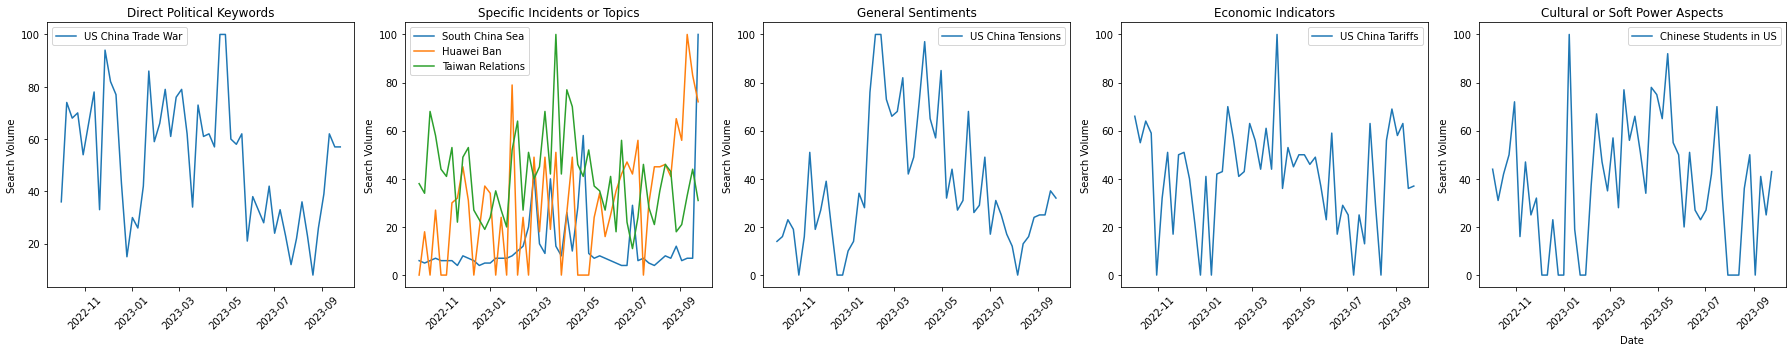

,count,mean,std,min,25%,50%,75%,max
US China Trade War,52.0,52.057692,23.705227,8.0,33.00,57.0,68.50,100.0
South China Sea,52.0,12.538462,16.354482,4.0,6.00,7.0,10.00,100.0
Huawei Ban,52.0,30.096154,24.733291,0.0,0.00,30.0,45.25,100.0
Taiwan Relations,52.0,40.173077,17.433033,11.0,27.00,40.5,49.50,100.0
US China Tensions,52.0,37.288462,27.069509,0.0,17.00,28.5,52.50,100.0
US China Tariffs,52.0,41.903846,21.077132,0.0,29.00,44.0,56.25,100.0
Chinese Students in US,52.0,37.653846,26.075219,0.0,22.25,36.5,52.00,100.0


In [29]:
# Grouping keywords by categories
categories = {
    "Direct Political Keywords": ['US China Trade War'],
    "Specific Incidents or Topics": ['South China Sea', 'Huawei Ban', 'Taiwan Relations'],
    "General Sentiments": ['US China Tensions'],
    "Economic Indicators": ['US China Tariffs'],
    "Cultural or Soft Power Aspects": ['Chinese Students in US']
}

# Plot the data for each catergory
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(25, 5))

for ax, (category, keywords) in zip(axes, categories.items()):
    for keyword in keywords:
        ax.plot(data[keyword], label=keyword)
    ax.set_title(category)
    ax.set_ylabel('Search Volume')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Compute basic statistics for each column
stats = data.describe().transpose()
stats


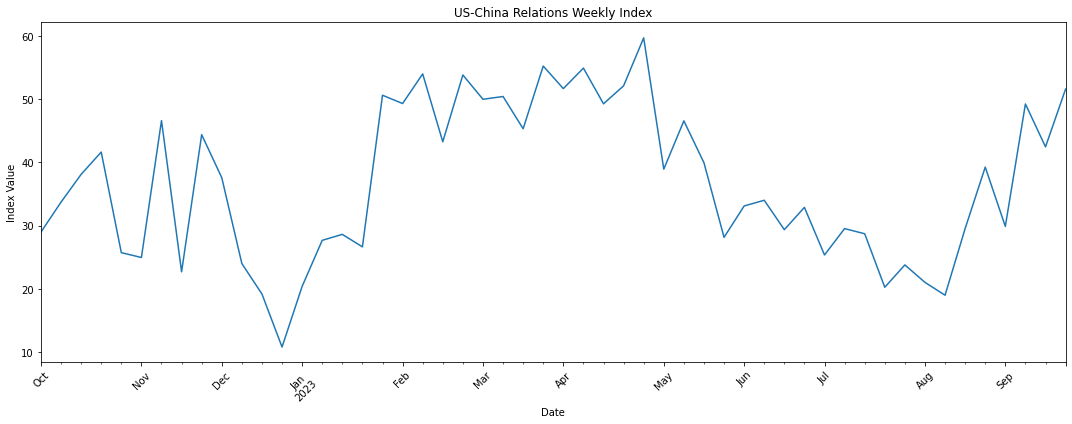

,weekly_index
date,
2022-10-02,28.963917
2022-10-09,33.714534
2022-10-16,38.109960
2022-10-23,41.639388
2022-10-30,25.712576
2022-11-06,24.942555
2022-11-13,46.623179
2022-11-20,22.673331
2022-11-27,44.394872


In [35]:
# Assign weights based on standard deviation
weights = stats['std'] / sum(stats['std'])

# Compute the weighted index for each week
data_weighted = data.multiply(weights, axis=1)
weekly_index = data_weighted.sum(axis=1)

# Plot the weekly index
plt.figure(figsize=(15, 6))
weekly_index.plot(title="US-China Relations Weekly Index")
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# store the weekly index to data frame
weekly_index = pd.DataFrame(weekly_index, columns=['weekly_index'])
weekly_index


## Question 2 

In [20]:
from pytrends.request import TrendReq
import pandas as pd

# Initialize pytrends session
pytrend = TrendReq()
# crarte a dictionary to store the data

key_pos_chi_1 = ['增益', '多头', '上涨', '买入', '成功']
key_pos_chi_2 = ['繁荣', '稳定', '利润', '强劲', '好转']

key_pos_eng_1 = ['Surge', 'Rally', 'Boom', 'Upside', 'Advance']
key_pos_eng_2 = ['Recovery', 'Stability', 'Earnings', 'Strong', 'Improvement']

key_neg_chi_1 = ['暴跌', '空头', '崩溃', '退步', '失误']
key_neg_chi_2 = ['困难', '警告', '回撤', '不确定', '失望']

key_neg_eng_1 = ['Slump', 'Downturn', 'Recession', 'Decline', 'Setback']
key_neg_eng_2 = ['Trouble', 'Warning', 'Retreat', 'Uncertainty', 'Disappointment']

key_word_dict = {}
key_word_dict['pos_chi_1'] = key_pos_chi_1
key_word_dict['pos_chi_2'] = key_pos_chi_2
key_word_dict['pos_eng_1'] = key_pos_eng_1
key_word_dict['pos_eng_2'] = key_pos_eng_2
key_word_dict['neg_chi_1'] = key_neg_chi_1
key_word_dict['neg_chi_2'] = key_neg_chi_2
key_word_dict['neg_eng_1'] = key_neg_eng_1
key_word_dict['neg_eng_2'] = key_neg_eng_2

key_word_dict

{'pos_chi_1': ['增益', '多头', '上涨', '买入', '成功'],
 'pos_chi_2': ['繁荣', '稳定', '利润', '强劲', '好转'],
 'pos_eng_1': ['Surge', 'Rally', 'Boom', 'Upside', 'Advance'],
 'pos_eng_2': ['Recovery', 'Stability', 'Earnings', 'Strong', 'Improvement'],
 'neg_chi_1': ['暴跌', '空头', '崩溃', '退步', '失误'],
 'neg_chi_2': ['困难', '警告', '回撤', '不确定', '失望'],
 'neg_eng_1': ['Slump', 'Downturn', 'Recession', 'Decline', 'Setback'],
 'neg_eng_2': ['Trouble',
  'Warning',
  'Retreat',
  'Uncertainty',
  'Disappointment']}

In [23]:
def get_data(key_word_dict, geo='CN', dict_name='pos_chi_1'):
    df = pd.DataFrame()
    for word in key_word_dict[dict_name]:
        pytrend.build_payload(kw_list=[word], timeframe = '2022-10-1 2023-9-30', geo = geo)
        py_res = pytrend.interest_over_time()
        if py_res.empty:
            continue
        py_res.drop(columns = ['isPartial'], inplace = True)
        if word == key_word_dict[dict_name][0]:
            df = py_res
        else:
            df = df.merge(py_res, on = 'date')
    return df

In [24]:
pos1_chi = get_data(key_word_dict, geo='CN', dict_name='pos_chi_1')
pos1_chi

,增益,多头,上涨,成功
date,,,,
2022-10-02,0,0,0,67
2022-10-09,0,0,47,89
2022-10-16,0,0,39,85
2022-10-23,23,27,54,79
2022-10-30,0,0,73,62
2022-11-06,26,29,66,85
2022-11-13,38,0,0,81
2022-11-20,0,0,42,72
2022-11-27,24,0,88,80


In [26]:
pos2_chi = get_data(key_word_dict, geo='CN', dict_name='pos_chi_2')
pos2_chi

,繁荣,稳定,利润,强劲,好转
date,,,,,
2022-10-02,27,60,68,0,32
2022-10-09,10,100,68,0,0
2022-10-16,12,90,85,0,17
2022-10-23,12,90,68,0,0
2022-10-30,25,59,59,0,0
2022-11-06,43,83,31,0,58
2022-11-13,19,78,50,0,0
2022-11-20,23,70,72,0,0
2022-11-27,15,69,23,0,21


In [27]:
pos1_eng = get_data(key_word_dict, geo='CN', dict_name='pos_eng_1')
pos1_eng

,Surge,Rally,Boom,Upside,Advance
date,,,,,
2022-10-02,87,0,41,38,33
2022-10-09,51,24,85,24,32
2022-10-16,64,43,50,0,36
2022-10-23,60,26,34,0,50
2022-10-30,51,87,32,0,84
2022-11-06,88,53,28,0,48
2022-11-13,43,60,50,0,61
2022-11-20,82,0,0,0,59
2022-11-27,22,36,70,0,71


In [28]:
pos2_eng = get_data(key_word_dict, geo='CN', dict_name='pos_eng_2')
pos2_eng

,Recovery,Stability,Earnings,Strong,Improvement
date,,,,,
2022-10-02,62,64,52,87,78
2022-10-09,84,44,73,79,60
2022-10-16,84,69,19,71,51
2022-10-23,70,61,44,91,100
2022-10-30,70,54,86,98,0
2022-11-06,57,74,19,82,55
2022-11-13,86,62,67,85,54
2022-11-20,73,49,45,49,77
2022-11-27,60,49,44,85,0


In [29]:
neg1_chi = get_data(key_word_dict, geo='CN', dict_name='neg_chi_1')
neg1_chi

,暴跌,空头,崩溃,退步,失误
date,,,,,
2022-10-02,0,38,18,0,0
2022-10-09,0,0,74,0,0
2022-10-16,20,43,80,0,17
2022-10-23,100,52,64,0,100
2022-10-30,15,33,85,23,0
2022-11-06,33,44,80,0,0
2022-11-13,21,0,75,0,0
2022-11-20,22,100,72,24,39
2022-11-27,0,0,70,0,40


In [30]:
neg2_chi = get_data(key_word_dict, geo='CN', dict_name='neg_chi_2')
neg2_chi

,困难,警告,失望
date,,,
2022-10-02,71,25,66
2022-10-09,12,25,0
2022-10-16,54,39,0
2022-10-23,38,22,42
2022-10-30,29,38,0
2022-11-06,27,11,0
2022-11-13,80,24,0
2022-11-20,55,42,0
2022-11-27,58,56,33


In [31]:
neg1_eng = get_data(key_word_dict, geo='CN', dict_name='neg_eng_1')
neg1_eng

,Slump,Downturn,Recession,Decline,Setback
date,,,,,
2022-10-02,0,0,34,67,0
2022-10-09,0,0,40,42,37
2022-10-16,0,18,22,77,44
2022-10-23,0,0,21,0,0
2022-10-30,54,0,24,55,0
2022-11-06,0,26,74,35,0
2022-11-13,21,48,36,0,0
2022-11-20,0,0,46,0,0
2022-11-27,0,18,51,17,0


In [32]:
neg2_eng = get_data(key_word_dict, geo='CN', dict_name='neg_eng_2')
neg2_eng

,Trouble,Warning,Retreat,Uncertainty,Disappointment
date,,,,,
2022-10-02,46,75,100,48,0
2022-10-09,51,68,0,44,0
2022-10-16,55,92,0,61,0
2022-10-23,25,51,13,34,47
2022-10-30,44,70,0,54,0
2022-11-06,100,98,0,15,0
2022-11-13,37,53,0,66,0
2022-11-20,45,86,32,41,0
2022-11-27,27,100,0,50,0


In [67]:
# concat the positive and negative data into svi_pos and svi_neg
svi_pos = pd.concat([pos1_chi, pos2_chi, pos1_eng, pos2_eng], axis=1)
svi_neg = pd.concat([neg1_chi, neg2_chi, neg1_eng, neg2_eng], axis=1)
stat_pos = svi_pos.describe().T
stat_neg = svi_neg.describe().T
print(stat_pos)
print('\n')
print(stat_neg)

             count       mean        std   min    25%   50%    75%    max
增益            52.0  23.596154  24.379564   0.0   0.00  23.5  36.50  100.0
多头            52.0  16.250000  24.964975   0.0   0.00   0.0  30.75  100.0
上涨            52.0  43.788462  25.459954   0.0  35.00  48.0  58.25  100.0
成功            52.0  75.423077  13.119879  44.0  69.00  74.5  85.00  100.0
繁荣            52.0  17.846154  20.042489   0.0   0.00  15.5  25.25  100.0
稳定            52.0  69.788462  11.885626  42.0  63.75  69.0  78.00  100.0
利润            52.0  53.750000  18.512185   0.0  43.75  56.5  67.25  100.0
强劲            52.0  14.769231  27.291179   0.0   0.00   0.0   9.25  100.0
好转            52.0  10.923077  21.100921   0.0   0.00   0.0  17.50  100.0
Surge         52.0  63.750000  18.668286  22.0  51.00  64.0  77.50  100.0
Rally         52.0  33.134615  29.342487   0.0   0.00  29.0  54.50  100.0
Boom          52.0  43.846154  21.533726   0.0  31.00  39.5  56.25  100.0
Upside        52.0  20.461538  27.3018

$
    Sentiment_t = \frac{1}{N} \sum_{i=1}^{N} SVI_{it}^{pos} - \frac{1}{N} \sum_{i=1}^{N} SVI_{it}^{neg}
$

In [47]:
# Calculate Sentiment Index
N_pos = len(svi_pos.columns)
N_neg = len(svi_neg.columns)

sentiment_index = svi_pos.mean(axis=1) - svi_neg.mean(axis=1)
sentiment_index = pd.DataFrame(sentiment_index, columns=['sentiment_index'])
sentiment_index

,sentiment_index
date,
2022-10-02,9.228070
2022-10-09,23.956140
2022-10-16,8.339181
2022-10-23,12.956140
2022-10-30,15.099415
2022-11-06,18.517544
2022-11-13,18.283626
2022-11-20,3.970760
2022-11-27,10.953216


In [68]:
# assign the weights interms of standard deviation
weights_pos = stat_pos['std'] / sum(stat_pos['std'])
weights_neg = stat_neg['std'] / sum(stat_neg['std'])

# Compute the weighted index for each week
svi_pos_weighted = svi_pos.multiply(weights_pos, axis=1)
svi_neg_weighted = svi_neg.multiply(weights_neg, axis=1)
index_pos = svi_pos_weighted.sum(axis=1)
index_neg = svi_neg_weighted.sum(axis=1)

sentiment_index_weighted = index_pos - index_neg
sentiment_index_weighted = pd.DataFrame(sentiment_index_weighted, columns=['sentiment_index_weighted'])
sentiment_index_weighted

,sentiment_index_weighted
date,
2022-10-02,4.209539
2022-10-09,19.448492
2022-10-16,3.359237
2022-10-23,9.618504
2022-10-30,13.183582
2022-11-06,14.774927
2022-11-13,15.721447
2022-11-20,1.009081
2022-11-27,6.783798


# Testing (Rt)

In [55]:
# load the data from csv file
daily_rt = pd.read_csv('IDX_Idxtrd.csv')
daily_rt.columns = ['code', 'date', 'ret']
# convert the code into 6 digits, fill the leading 0s
daily_rt['code'] = daily_rt['code'].apply(lambda x: str(x).zfill(6))
# convert the date into datetime format
daily_rt['date'] = pd.to_datetime(daily_rt['date'])
# calculate the weekly return
daily_rt['week'] = daily_rt['date'].dt.week
daily_rt['year'] = daily_rt['date'].dt.year
daily_rt['week_ret'] = daily_rt.groupby(['year', 'week','code'])['ret'].transform('sum')
daily_rt.drop(columns=['ret'], inplace=True)
# drop the duplicates for week and year for each code
daily_rt = daily_rt.drop_duplicates(subset=['year', 'week', 'code'], keep='first')
daily_rt = daily_rt[['code', 'year', 'week', 'week_ret']].reset_index(drop=True)
daily_rt

/var/folders/74/xjyr_wpj7njfggsgt60kbgvc0000gn/T/ipykernel_91993/309299340.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  daily_rt['week'] = daily_rt['date'].dt.week


,code,year,week,week_ret
0,000001,2022,41,1.6045
1,000001,2022,42,-1.0734
2,000001,2022,43,-4.0810
3,000001,2022,44,5.2474
4,000001,2022,45,0.5532
...,...,...,...,...
145,399106,2023,35,3.7406
146,399106,2023,36,-0.9000
147,399106,2023,37,-1.2571
148,399106,2023,38,0.1550


In [74]:
# index date to columns
tmp = sentiment_index_weighted.copy().reset_index(inplace=False)
tmp['date'] = pd.to_datetime(tmp['date'])
tmp['week'] = tmp['date'].dt.week
tmp['year'] = tmp['date'].dt.year

tmp = tmp[['year', 'week', 'sentiment_index_weighted']].dropna().reset_index(drop=True)
tmp.head()

/var/folders/74/xjyr_wpj7njfggsgt60kbgvc0000gn/T/ipykernel_91993/4187089700.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  tmp['week'] = tmp['date'].dt.week


,year,week,sentiment_index_weighted
0,2022,39,4.209539
1,2022,40,19.448492
2,2022,41,3.359237
3,2022,42,9.618504
4,2022,43,13.183582


In [75]:
# merge the sentiment index and weekly return
df = daily_rt.merge(tmp, on=['year', 'week'], how='left')
df.dropna(inplace=True)
df

,code,year,week,week_ret,sentiment_index_weighted
0,000001,2022,41,1.6045,3.359237
1,000001,2022,42,-1.0734,9.618504
2,000001,2022,43,-4.0810,13.183582
3,000001,2022,44,5.2474,14.774927
4,000001,2022,45,0.5532,15.721447
...,...,...,...,...,...
144,399106,2023,34,-3.4893,4.312435
145,399106,2023,35,3.7406,25.336856
146,399106,2023,36,-0.9000,19.366604
147,399106,2023,37,-1.2571,8.178750


In [77]:
import statsmodels.api as sm
# execute the regression model for each code
for code in df['code'].unique():
    tmp = df[df['code'] == code]
    X = sm.add_constant(tmp['sentiment_index_weighted'])
    y = tmp['week_ret']
    model = sm.OLS(y, X)
    results = model.fit()
    print(code)
    print(results.summary())
    print('\n')

000001
                            OLS Regression Results                            
Dep. Variable:               week_ret   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8382
Date:                Wed, 11 Oct 2023   Prob (F-statistic):              0.365
Time:                        19:20:52   Log-Likelihood:                -96.379
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const            

/Users/bhchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/bhchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/bhchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
